<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
jobs = pd.read_csv("./data/job_listings.csv")
print(jobs.shape)
jobs.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
jobs['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text()).head()

0    b"Job Requirements:\nConceptual understanding ...
1    b'Job Description\n\nAs a Data Scientist 1, yo...
2    b'As a Data Scientist you will be working on c...
3    b'$4,969 - $6,756 a monthContractUnder the gen...
4    b'Location: USA \xe2\x80\x93 multiple location...
Name: description, dtype: object

In [5]:
jobs['cleaned_description'] = jobs['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [6]:
jobs.head()

,Unnamed: 0,description,title,cleaned_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [7]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [8]:
# EXTENDING STOP WORDS
# STOP_WORDS = nlp.Defaults.stop_words.union(["check", "1", "coffee", "the"])
STOP_WORDS = nlp.Defaults.stop_words

In [9]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_space == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [10]:
jobs['spacey_tokens'] = jobs['cleaned_description'].apply(get_lemmas)

In [11]:
jobs.head()

,Unnamed: 0,description,title,cleaned_description,spacey_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understand,..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'job, description\n\na, Data, Scientist, 1, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'as, Data, scientist, work, consult, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'location, USA, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
count = CountVectorizer()
bag_of_words = count.fit_transform(jobs['cleaned_description'])


bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
feature_names = count.get_feature_names()

In [21]:
pd.DataFrame(bag_of_words.toarray(), columns=feature_names).head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [22]:
doc_len = [len(doc) for doc in jobs['cleaned_description']]

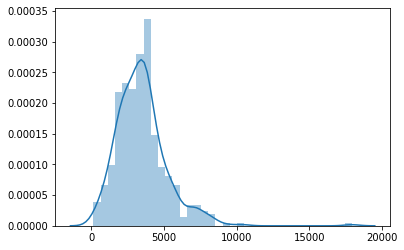

In [24]:
import seaborn as sns

sns.distplot(doc_len)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [28]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [30]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2), # ngram = max size of phrase
                        max_df=.97,
                        min_df=3,
                        tokenizer=get_lemmas)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(jobs['cleaned_description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,...,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need\n\nphd,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.026332,0.0,0.028753,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.183774,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.140781,0.0,0.153722,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [31]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [33]:
nn.kneighbors([dtm.iloc[300]])

(array([[0.        , 1.25796618, 1.28171141, 1.28389019, 1.29141114]]),
 array([[300, 201, 285, 376, 172]]))

In [40]:
jobs['cleaned_description'][300][:500]

"b'We are looking for an experienced Data Scientist to launch our new analytical framework for predicting consumer behavior in the mortgage buying process. In this role, you will work closely with Product Management to analyze potential data sources, design key modeling capabilities, and develop new systems for continuous improvement. Nomis is the market leader in bringing pricing optimization to retail banking and you will be responsible for achieving the same level of success as we enter the US"

In [42]:
jobs['cleaned_description'][285][:500]

'b"---------------\\nWho is Jornaya?\\n---------------\\n\\nAt Jornaya, ( http://www.jornaya.com/ ) we believe in using innovative technology and data that empowers companies to connect with their customers and prospects at the right time and in the most meaningful way. We take pride in helping our clients understand and apply our solutions and data to improve their digital marketing strategies in new and creative ways. When our clients win, we win.\\n\\n-----------------\\nPosition Overview\\n----------'

In [60]:
ideal_job=["""environmental water data python oregon washington"""]

In [61]:
new = tfidf.transform(ideal_job)

In [62]:
nn.kneighbors(new.todense())

(array([[1.2974585 , 1.2974585 , 1.30139415, 1.30139415, 1.32203046]]),
 array([[315, 207, 317,  74, 409]]))

In [66]:
jobs['cleaned_description'][409][:1000]

"b'With annual sales of $15 billion, Ecolab (ECL) is the global leader in water, hygiene and energy technologies and services that protect people and vital resources. Our 49,000 associates help make the world cleaner, safer and healthier by delivering critical insights and innovative solutions to help our customers achieve clean water, safe food, abundant energy and healthy environments at nearly three million customer locations in more than 170 countries.\\nOur innovative products and services touch virtually every aspect of daily life and are used in hospitals, hotels, restaurants, schools, manufacturing plants, refineries and other locations throughout the world. Many of the world\\xe2\\x80\\x99s most recognizable brands rely on Ecolab to help ensure operational efficiencies, product integrity and brand reputation.\\nWhen you come to work at Ecolab, you get to take on some of the world\\xe2\\x80\\x99s most meaningful challenges \\xe2\\x80\\x93 and have the opportunity to learn and g

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 